## Time to get your hands dirty. Your first neural network; pick your favourite.


For the last coding assignment, you'll need to implement a neural network. We'll look at a relatively simple binary classification problem. Here below are three options; completing one of them for the exam is enough

### Tasks:

1. Remember: scale your data appropriately

2. Decide on a testing strategy (a simple test/train split? a CV strategy? set a test set aside to be looked at at the very end?)

2. Decide your optimization metric.

3. Write down your network architecture. You can start from a fully connected, multi-layer perceptron (and then explore)

4. Use one the package among those we've seen. These include Tensorflow via keras, pytorch, and the MPL classifier implemented in scikit-learn. This is an opportunity to pick the one you're most interested in learning. 

5. Optimize the hyperparameters of your network. Explore different hyperparameters and see what fits the data best.  Do your best now to optimize the network architecture. Be creative!

6. Report on the perfomance of the network on the test set; report other metrics that have not been optimized.


### A few tips:

- In scikit-learn, remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.
- If it takes too long, run the hyperparameter optimization on a subset of the training set. Then retrain the full network using the best hyperparameters only.
- On cross validation, for scikit learn we've seen how to use `GridSearchCV` already. For Tensorflow, there's a really cool tool called [Tensorboard](https://www.tensorflow.org/tensorboard)

### Datasets:

You can choose one of these three problems:

- **1. Galaxies vs quasars (but with neural networks)** Go back to our SDSS data we've used in Lecture 19. We had color differences, and the task was to classifty quasars vs galaxies. Repeat that task with a neural network.

- **2. Can a computer learn if we're going to detect gravitational waves? (but with neural networks)** Go back to the SNR classifier for gravitational wave events, same data we've used in Lecture. We had properties of black hole binaries, and the task was to classify. Repeat that task with a neural network.

- **3. The HiggsML challenge** Branching out of astrophysics, let's mess around with a dataset of simulated but  realistic events from the ATLAS particle detector at CERN.
    - Data are at `solutions/higgs.tar.gz` (you need to uncompress with `tar -czvf`)
    - There are $N_{\rm samples} = 2.5\times 10^5$ entries with $N_{\rm features}=30$ features each. 
    - The taks is that of classifying these features against a set of labels, which are either `s` (source) or `b` (background).
    - For some info on both the physics and the dataset see [this document](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf); includes a description of the features and how data have been padded (-999) for missing values.
    - This dataset was part of a challenge that run on Kaggle in 2014: https://higgsml.ijclab.in2p3.fr/ 



#### (On dataset 2, this is the best I could do...)

Together with Alberto Vecchio and Geraint Prattent, I tackled this gravitational-wave classification problem using neural networks in this paper: [arXiv:2007.06585](https://arxiv.org/abs/2007.06585). 
- In the paper we reached an accuracy (true positive + true negative / total) of $98.4\%$. The data you're using are those of the green curve in Fig 2 of that paper. Could you do better? If yes, please tell me how! 
- I should have really put a figure with my ROC in that paper but I didn't!

In [1]:
import numpy as np
import pylab as plt
import pandas as pd

data = pd.read_csv("../../../dati_higgs.csv")
data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [2]:
# these are 250000 data, with a lot of them has missing values -999 these has to be cleaned up...
# remove all the column that has too many null values
for column in data.columns:
    count = (data[column] == -999).sum()
    if (count/2500 > 0):
        print(f"{column} , percentage -999 = {count/2500}%")
        if (count/2500 > 80): #80 = leave all the column but has less data, 50 = remove 7 column and gain a lot of data, 10 = remove all the column 
            data = data.drop(columns=[column])

DER_mass_MMC , percentage -999 = 15.2456%
DER_deltaeta_jet_jet , percentage -999 = 70.9828%
DER_mass_jet_jet , percentage -999 = 70.9828%
DER_prodeta_jet_jet , percentage -999 = 70.9828%
DER_lep_eta_centrality , percentage -999 = 70.9828%
PRI_jet_leading_pt , percentage -999 = 39.9652%
PRI_jet_leading_eta , percentage -999 = 39.9652%
PRI_jet_leading_phi , percentage -999 = 39.9652%
PRI_jet_subleading_pt , percentage -999 = 70.9828%
PRI_jet_subleading_eta , percentage -999 = 70.9828%
PRI_jet_subleading_phi , percentage -999 = 70.9828%


In [3]:
# Remove all rows that contain -999 in any column
data = data[~(data == -999).any(axis=1)]

# Replace 's' with 1 and 'b' with 0 in the 'Label' column,
data['Label'] = data['Label'].replace({'s': 1, 'b': 0})

# remove also the ID column , it's just a progressiv number... useless
data = data.drop(columns=['EventId'])

data

/tmp/ipykernel_39891/1236526853.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace({'s': 1, 'b': 0})
/tmp/ipykernel_39891/1236526853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Label'].replace({'s': 1, 'b': 0})


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,1
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,0
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,1
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,...,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170,0
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,...,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249976,137.371,4.640,92.603,107.121,3.189,322.430,-2.384,2.149,2.755,225.261,...,2,85.132,1.991,-1.518,51.068,-1.197,-2.831,136.200,0.001503,1
249980,119.934,20.078,88.751,35.227,0.660,111.491,1.836,2.800,18.532,189.198,...,2,69.219,-1.064,1.118,43.719,-1.725,-2.756,112.938,0.018636,1
249985,126.151,29.023,95.258,152.684,1.000,163.066,-0.240,1.504,24.642,327.502,...,2,158.904,0.401,0.034,34.196,-0.599,-2.525,193.099,0.018636,1
249993,130.075,3.918,66.781,77.369,0.936,322.296,-0.207,3.102,49.937,610.482,...,3,155.864,-0.358,1.093,134.344,0.578,-2.215,546.066,0.001503,1


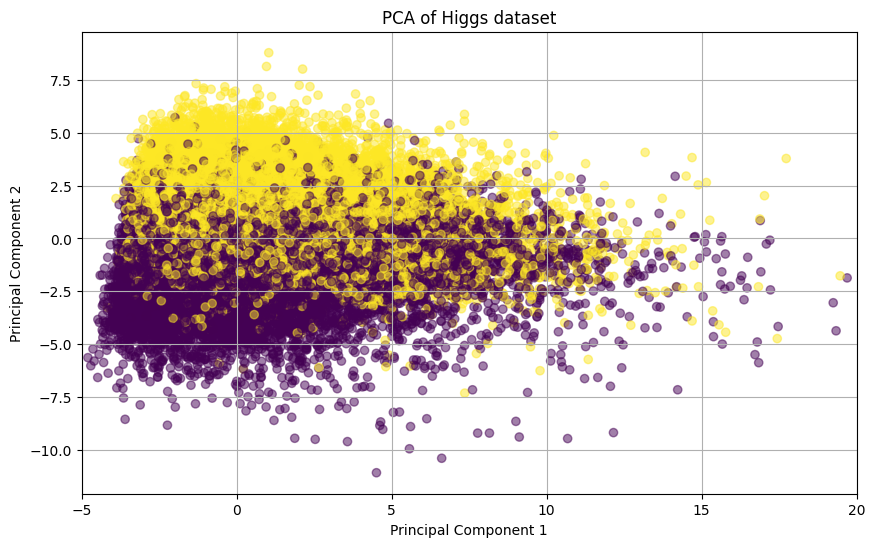

Explained variance by each component: [20.22517156 11.58527629  8.48859471  5.71275718  5.62482414]%


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y  = np.array(data['Label']) #it's the discrimative
x_scaled = StandardScaler().fit_transform(data.drop(columns=['Label']))

pca = PCA(n_components=5)
X_pca = pca.fit_transform(x_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA of Higgs dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.xlim(-5, 20)
plt.show() 

# percentuage of explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance*100}%")

# I've tried IsoMap, t-SNE and other non linear ... but they struggle a lot
#If I remove the column with a lot of data, the PCA show a worst division of the points, so that even if I don't really understan the physics behind the parameters, i've decided to keep them

In [5]:
import tensorflow as tf #installed the CPU version instead of the GPU version given by the prof
from sklearn.model_selection import train_test_split 
from tensorflow.keras import layers, regularizers #neded for the L2 regularization
from tensorflow import keras


print(tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

2025-07-02 14:35:29.073785: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.19.0
GPU available: []


In [21]:
# This parameters are used only to understand if the model has any sense

epochs = 15
batch_size = 15

# prepare the shape for X, the y is already done before
X = x_scaled.astype('float32')

#Let's NOT perform a cross-validation to check that the base model is stable and doesn't have issues when the input data changes. 
# I need only to test the model once, because the data are shuffled
# Then we'll do some hyperparameter tuning

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# divid X_temp in train e validation 
val_size = 0.10 / (1 - 0.15)  # 10% of the total
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, random_state=42, stratify=y_temp)

# building the model by hand
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(X.shape[1],), kernel_regularizer=regularizers.l2(0.001)), # first layer
    #tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1(0.1)),                            # second layer
    tf.keras.layers.Dense(1, activation='sigmoid')                                                                     # the sigmoid give a binary output : signal or not
])

# Dense = fully connected neurons, each neuron of a leyer connect with all the other af the next layer
# Different activation function for each layer

# model compilation

model.compile(
    optimizer='adam',               # Use the Adam optimizer (adaptive learning rate, usually works very well out of the box)
    loss='binary_crossentropy',     # Binary cross-entropy: best suited for binary classification (output 0 or 1)
    metrics=['accuracy']            # During training and evaluation, show the classification accuracy
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0
)

y_pred_prob = model.predict(X_test)  # Probability, non classes, value between 0 and 1
_, acc = model.evaluate(X_test, y_test, verbose=0)


model.summary() #visualize the architecture


/home/bossi_ricky/WSL_Shared/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 4)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268 (1.05 KB)

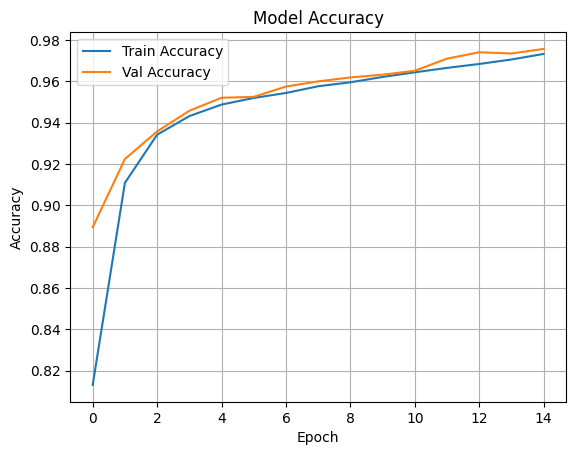

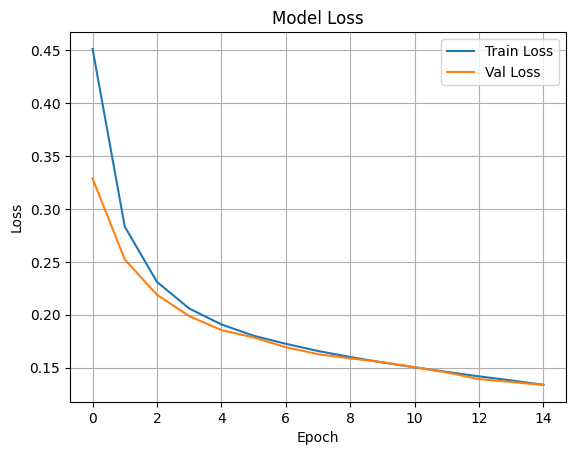

In [22]:
#Let's have a look at the metrics and model values 

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid()
plt.show()


Both the Loss are going down , we are not overfitting with this parameter i propose, we are learning properly the dataset, so I can cross validate the best value for each parameter 


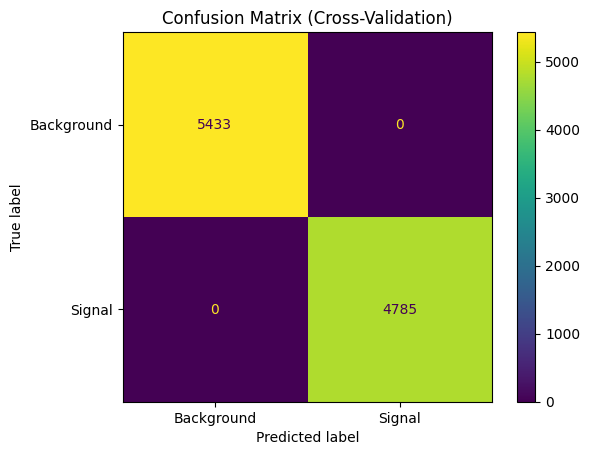


Accuracy : 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# to fix type problem
y_pred_class = (np.array(y_pred_prob) > 0.5).astype(int)

# Confusion matrix cumulativa
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Background', 'Signal'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix (Cross-Validation)')
plt.grid(False)
plt.show()

# other metrics
print(f"\nAccuracy : {acc:.4f}")
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

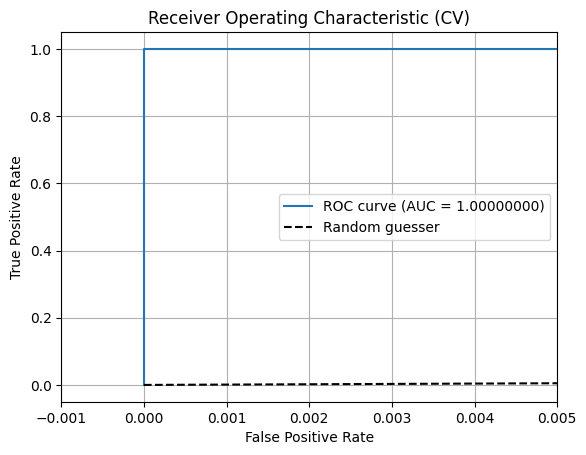

In [9]:
from sklearn.metrics import roc_curve

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = np.trapezoid(tpr, fpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.8f})")
plt.plot([0, 1], [0, 1], 'k--', label = f"Random guesser")  # linea del caso random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (CV)')
plt.grid()
plt.legend()
plt.xlim(-0.001 , 0.005)
plt.show()

In [10]:
import keras_tuner 

def model_builder(hp):
    """
    Builds and compiles a Keras model using hyperparameters provided by Keras Tuner.
    This function is designed to be passed to a tuner (Hyperband).
    
    Parameters:
    hp (kerastuner.HyperParameters): An object used to define and sample hyperparameters.

    Returns:
    model (tf.keras.Model): A compiled Keras model with the chosen hyperparameters.
    """

    # Initialize a Sequential model
    model = tf.keras.Sequential()

    # ---- POSSIBLE PARAMETERS ----

    # TUNE: number of hidden layers (between 1 and 4)   JUST A REMINDER THAT I CAN, BUT I WONT NOW... too long
    # num_layers = hp.Int('num_layers', min_value=1, max_value=4)

    #TUNE: the activation function between this, I could create two different activation ... but it's too much
    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])

    # TUNE: Number of units in the first hidden Dense layer.
    # Range from 16 to 128 in steps of 16. This controls the model's capacity.
    hp_units_1 = hp.Int('units_1', min_value=16, max_value=128, step=8)

    # TUNE: Number of units in the second Dense layer
    # A smaller range (8 to 64 in steps of 8) helps balance between under/overfitting
    hp_units_2 = hp.Int('units_2', min_value=8, max_value=64, step=4)

    # TUNE: regularization value, pit it in float
    # Regularization strength (valore continuo tra 1e-5 e 1e-2)
    reg_val = hp.Float('reg_value',  min_value=1e-5, max_value=1e-2, sampling='log' )  # cerca logaritmicamente tra 10^-5 e 10^-2

    #TUNE: Regularization type hyperparameter, I could create two different regularization or a mix l1*l2 ... but it's too much
    reg_type = hp.Choice('regularizer', ['l1', 'l2'])
   
    # Learning rate significantly affects convergence speed and stability
    # Learning rate (valore continuo tra 1e-5 e 1e-2)
    hp_learning_rate = hp.Float('learning_rate',min_value=1e-5, max_value=1e-2,sampling='log')   # cerca logaritmicamente tra 10^-5 e 10^-2

    # Define the actual regularizer
    if reg_type == 'l1':
        reg = regularizers.l1(reg_val)
    else :
        reg = regularizers.l2(reg_val)


    # --- BUILDING THE MODEL ------------------------------

    model.add(
        layers.Dense(
            units=hp_units_1,
            activation= hp_activation,                   
            kernel_regularizer=reg, 
            input_shape=(X.shape[1],)                   # Input dimension must match feature size
        )
    )

    model.add(
        layers.Dense(
            units=hp_units_2,
            activation= hp_activation,                   
            kernel_regularizer=reg
        )
    )
    
    model.add(
        layers.Dense(
            units=1,                            # Single output for binary classification
            activation='sigmoid',               # Always sigmoid for binary output,               
            kernel_regularizer=reg  
        )
    )


    # Compile the model with binary crossentropy loss (for binary classification)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',   # Suitable for binary classification
        metrics=['accuracy']          # Track accuracy during training
    )

    return model



In [11]:
#GRIDSEARCHCV non è compatibile con keras... o lo faccio a mano oppure:

from tqdm.notebook import tqdm

EPOCHE = 30 #don't really care

# Launch the hyperparameter search

best_results = []
best_val_acc = 0.0
best_config = None

for batch_size in tqdm([64, 96, 128]): # can not put batch in keras tunig, because is not an hyper parameter about the model, is an hyper parameter of how i trained it, so i have to do a loop and choose the best one


    tuner = keras_tuner.Hyperband(
        model_builder,              # Function that builds the model using tunable hyperparameters
        objective ='val_accuracy',   # Goal: maximize validation accuracy during tuning
        max_epochs = EPOCHE,          # Max number of training epochs per trial
        project_name = f'higgs_{batch_size}'  # Project name (used for organizing results)
    )

    # Define an EarlyStopping callback to prevent overfitting and save time
    # Training will stop if val_loss doesn't improve for 3 consecutive epochs
    stop_early = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=2,
        restore_best_weights=True
    )

    # Perform hyperparameter search for the current batch size
    tuner.search(
        X_train, y_train,
        epochs= EPOCHE,                # Fixed number of training epochs
        validation_data=(X_val, y_val),        # Use 10% of training data for validation
        batch_size=batch_size,        
        callbacks=[stop_early],       # Early stopping to prevent overfitting
        verbose=0                     
    )

    # Get the best hyperparameters found in THIS batch
    best_hp = tuner.get_best_hyperparameters(1)[0]

    # Rebuild the model using the best found hyperparameters
    model = tuner.hypermodel.build(best_hp)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(best_hp.get('learning_rate')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Train the model again to evaluate validation accuracy consistently
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs= EPOCHE,                
        batch_size=batch_size,       
        verbose=0
    )

    # Extract the highest validation accuracy reached during training
    val_acc = max(history.history['val_accuracy'])

    # Save results for later comparison
    best_results.append((batch_size, best_hp, val_acc))

    # If this run achieved the highest val accuracy so far, store it as best
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_config = (batch_size, best_hp)

#-------------------------------------------------------------------

  0%|          | 0/3 [00:00<?, ?it/s]

Reloading Tuner from ./higgs_64/tuner0.json


/home/bossi_ricky/WSL_Shared/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Reloading Tuner from ./higgs_96/tuner0.json
Reloading Tuner from ./higgs_128/tuner0.json


In [12]:
print("\nBest Configuration:")
print(f"Best Batch Size: {best_config[0]}")  # Tuned manually in outer loop

# Retrieve best hyperparameters from Keras Tuner
best_hp = best_config[1]

# Print all tuned model hyperparameters
print(f"Best Activation Function: {best_hp.get('activation')}")
print(f"Best Number of Units in First Layer: {best_hp.get('units_1')}")
print(f"Best Number of Units in Second Layer: {best_hp.get('units_2')}")
print(f"Best Regularizer Type: {best_hp.get('regularizer')}")
print(f"Best Regularization Value: {best_hp.get('reg_value')}")
print(f"Best Learning Rate: {best_hp.get('learning_rate')}")


Best Configuration:
Best Batch Size: 64
Best Activation Function: tanh
Best Number of Units in First Layer: 16
Best Number of Units in Second Layer: 24
Best Regularizer Type: l1
Best Regularization Value: 0.0026824801297865106
Best Learning Rate: 0.004417133495788292


# Hyperband: A Scalable Hyperparameter Optimization Algorithm

## What is Hyperband?

**Hyperband** is a bandit-based algorithm for hyperparameter optimization, introduced by Li et al. (2016). It efficiently explores a large space of model configurations by dynamically allocating resources (e.g., training epochs) to the most promising candidates.

It builds on **Successive Halving**, which evaluates many models for few resources, retains the best-performing ones, and increases their resources in stages.

---

## How Hyperband Works

1. Randomly sample many hyperparameter configurations.
2. Train each for a small number of epochs.
3. Select the top-performing fraction (e.g. top 1/3).
4. Train the selected models longer.
5. Repeat the process across multiple brackets, each with different resource allocations.

This allows Hyperband to **balance exploration and exploitation**, focusing compute power where it matters most.

---

## Hyperband vs. Cross-Validation

While both aim to improve model performance, their roles are different:

| Technique         | Purpose                                | What it selects                      |
|------------------|----------------------------------------|--------------------------------------|
| **Cross-Validation** | Evaluates the generalization of a given model | A reliable performance estimate      |
| **Hyperband**        | Optimizes hyperparameters over many models     | The best-performing configuration    |

🔁 **They are complementary**:  
Hyperband can use cross-validation internally to evaluate each configuration more robustly.

---

## Why Use Hyperband?

- ✅ Efficient with limited compute
- 📊 Scalable to large hyperparameter spaces
- 🚀 Quickly eliminates poor configurations
- 🔧 Flexible with any model type

Compared to grid or random search, Hyperband is **significantly more efficient** and often **more effective**, especially when training deep networks is costly.


In [13]:
best_batch, best_hps = best_config

model = model_builder(best_hps)
model.compile(
    optimizer=tf.keras.optimizers.Adam(best_hps.get('learning_rate')),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHE,
    batch_size=best_batch,
    verbose=1
)

Epoch 1/30
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8712 - loss: 0.5143 - val_accuracy: 0.9605 - val_loss: 0.2272
Epoch 2/30
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9690 - loss: 0.2068 - val_accuracy: 0.9937 - val_loss: 0.1450
Epoch 3/30
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.1454 - val_accuracy: 0.9780 - val_loss: 0.1651
Epoch 4/30
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9961 - loss: 0.1120 - val_accuracy: 0.9993 - val_loss: 0.0934
Epoch 5/30
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9966 - loss: 0.0992 - val_accuracy: 0.9981 - val_loss: 0.0962
Epoch 6/30
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9975 - loss: 0.0932 - val_accuracy: 0.9753 - val_loss: 0.1518
Epoch 7/30
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9958 - loss: 0.0948 - val_accuracy: 1.0000 - val_loss: 0.0782
Epoch 8/30
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9990 - loss: 0.0798 - val_accuracy: 0.

In [14]:
model.save("my_keras_model.h5")

# Reload model
model = keras.models.load_model("my_keras_model.h5")

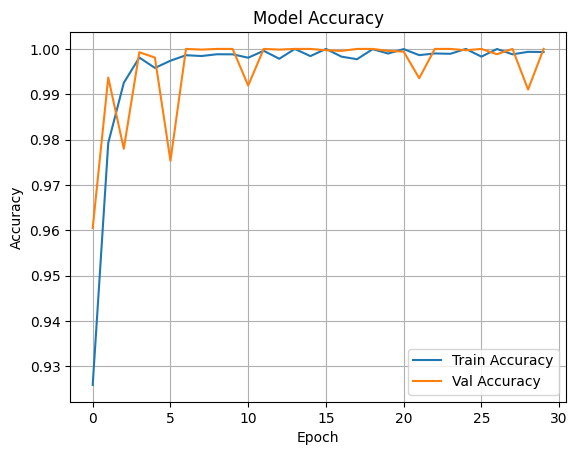

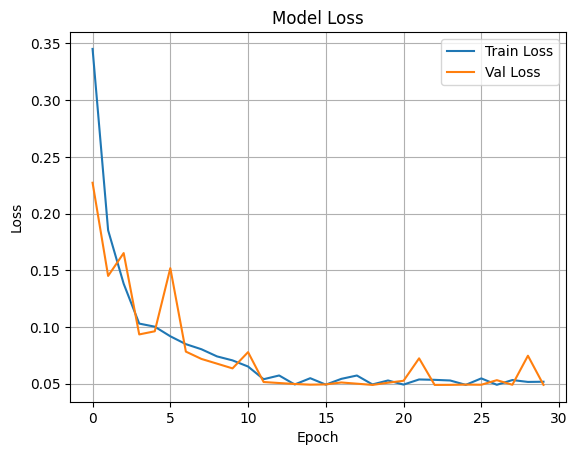

In [15]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid()
plt.show()

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


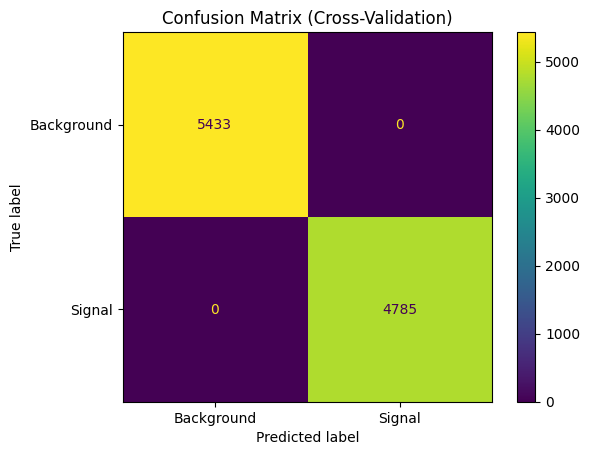

NEW Precision: 1.0 | OLD : 1.0
NEW Recall: 1.0 | OLD : 0.9995820271682341
NEW F1 Score: 1.0 | OLD : 0.9997909698996655
NEW AUC: 1.0 | OLD : 1.0


Model improvement: 
precision: 0.0 %
Recall: 0.041814760610494245 %
precision: 0.020907380305249128 %
AUC:  0.0 %


In [16]:
y_pred_prob = model.predict(X_test)  # Probabilità, non classi, valore tra 0 e 1
y_pred_class = (np.array(y_pred_prob) > 0.5).astype(int)

# Confusion matrix cumulativa
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Background', 'Signal'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix (Cross-Validation)')
plt.grid(False)
plt.show()

# other metrics
precision_best = precision_score(y_test, y_pred_class)
recall_best = recall_score(y_test, y_pred_class)
f1_best = f1_score(y_test, y_pred_class)

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc_best = np.trapezoid(tpr, fpr)

print("NEW Precision:", precision_best ,"| OLD :", precision)
print("NEW Recall:", recall_best ,"| OLD :", recall)
print("NEW F1 Score:", f1_best, "| OLD :", f1)
print("NEW AUC:", roc_auc_best, "| OLD :", roc_auc)

#--------------
print("\n\nModel improvement: ")
print("precision:" , (precision_best - precision)*100/precision , "%")
print("Recall:" , (recall_best - recall)*100/recall , "%")
print("precision:" , (f1_best - f1)*100/f1 , "%")
print("AUC: ", (roc_auc_best-roc_auc)*100/roc_auc ,"%")

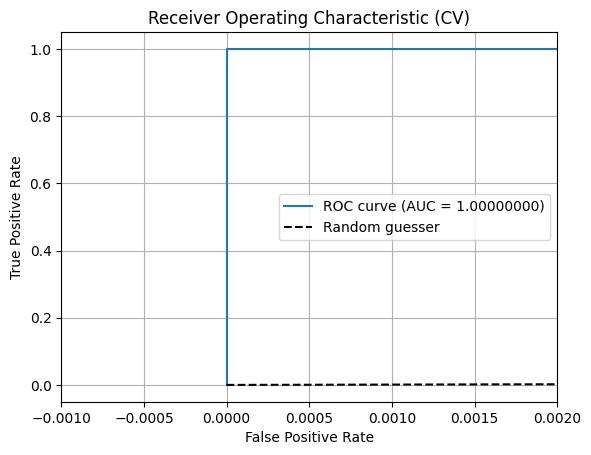

In [17]:
# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.8f})")
plt.plot([0, 1], [0, 1], 'k--', label = f"Random guesser")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (CV)')
plt.grid()
plt.legend()
plt.xlim(-0.001 , 0.002)
plt.show()